In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

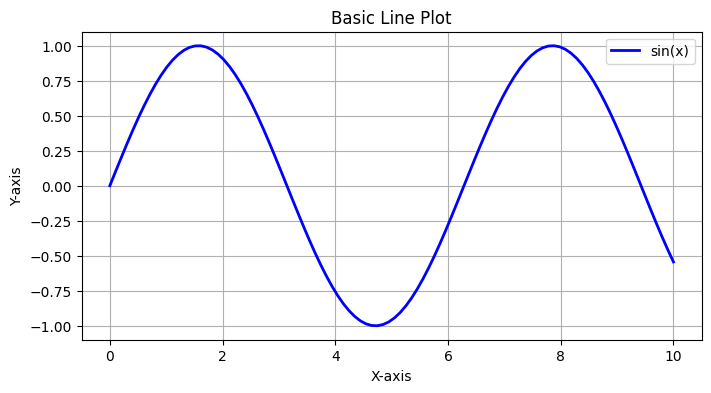

In [15]:
x=np.linspace(0,10,100)
y=np.sin(x)

plt.figure(figsize=(8,4)) # this is canvas
plt.plot(x, y, color='blue', linewidth=2, linestyle='-', label='sin(x)') # plot
plt.title("Basic Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_8133/2789789929.py:2: RuntimeWarning: divide by zero encountered in log
  y=np.log(x)


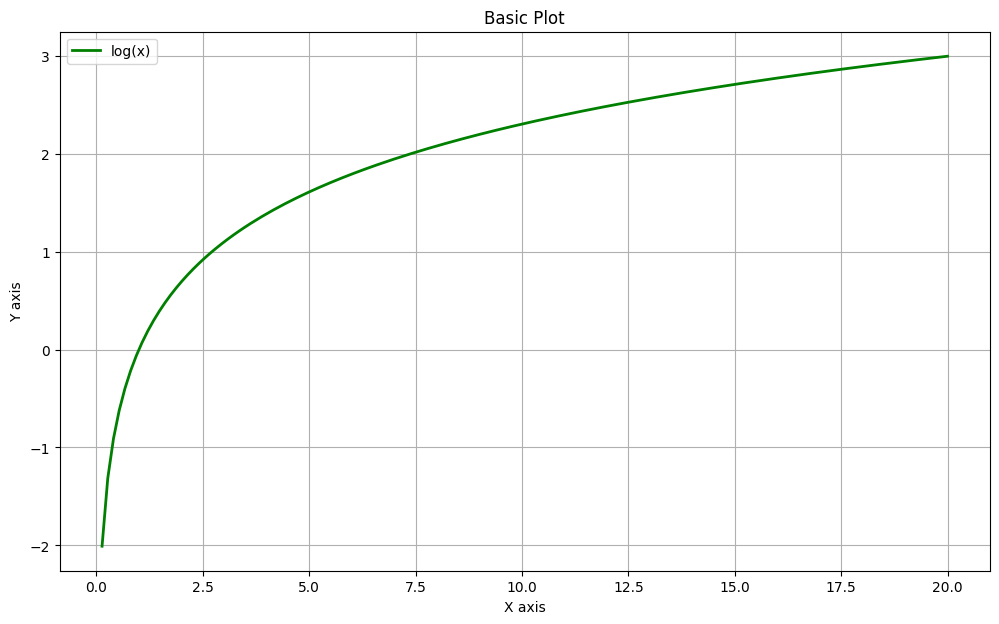

In [16]:
x=np.linspace(0,20,150)
y=np.log(x)

plt.figure(figsize=(12,7))
plt.plot(x,y,color='green',lw='2',ls='-',label='log(x)')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Basic Plot")
plt.grid(True)
plt.legend()
plt.show()

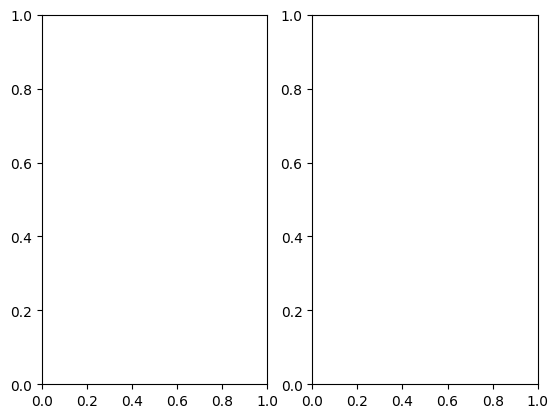

In [37]:
fig, axes=plt.subplots(nrows=1,ncols=2)

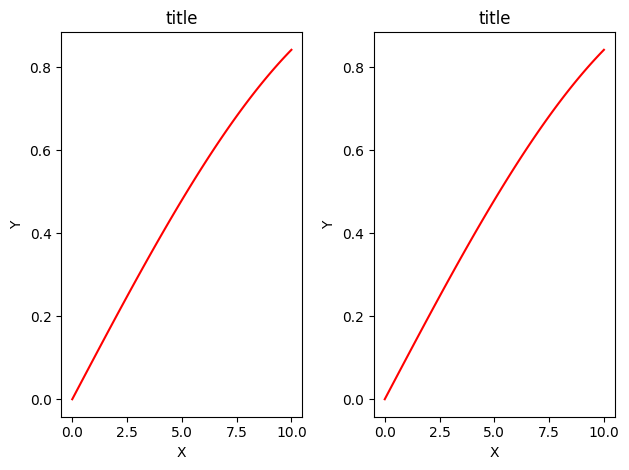

In [39]:
fig,axes=plt.subplots(nrows=1,ncols=2)
for ax in axes:
    ax.plot(x,y,'r')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("title")

fig
plt.tight_layout()

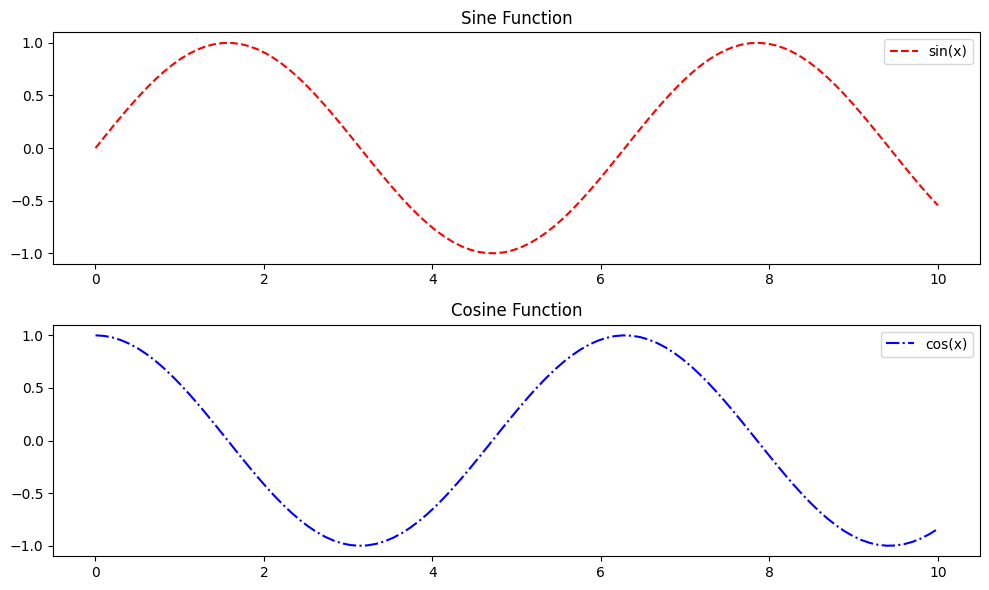

In [ ]:
x = np.linspace(0, 10, 100)
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(x, np.sin(x), 'r--', label='sin(x)')
plt.legend()
plt.title("Sine Function")

plt.subplot(2,1,2)
plt.plot(x, np.cos(x), 'b-.', label='cos(x)')
plt.legend()
plt.title("Cosine Function")

plt.tight_layout()
plt.show()

# use  in compare indicators or stock vs benchmark in one view


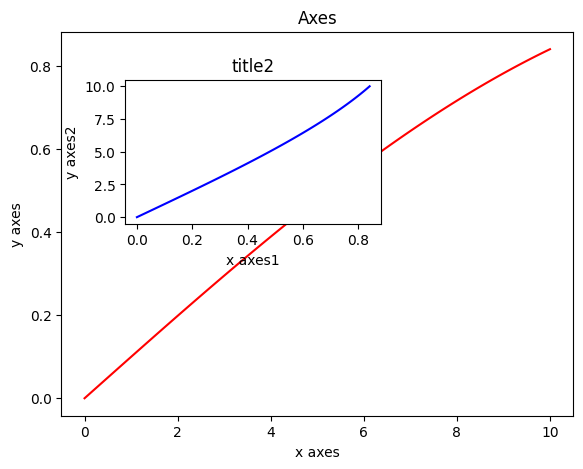

In [36]:
fig=plt.figure()

axes1=fig.add_axes([0.1,0.1,0.8,0.8])
axes2=fig.add_axes([0.2,0.5,0.4,0.3])

axes1.plot(x,y,'r')
axes1.set_xlabel("x axes")
axes1.set_ylabel("y axes")
axes1.set_title("Axes")

axes2.plot(y,x,'b')
axes2.set_xlabel("x axes1")
axes2.set_ylabel("y axes2")
axes2.set_title("title2");
plt.show()

In [ ]:
## dpi is dot-per-inch(pixel per inch)
fig=plt.figure(figsize=(10,6),dpi=100)


<Figure size 1000x600 with 0 Axes>

In [42]:
%pip install yfinance

  Using cached yfinance-0.2.66-py2.py3-none-any.whl.metadata (6.0 kB)
  Using cached multitasking-0.0.12.tar.gz (19 kB)
  Preparing metadata (setup.py) ... done
  Using cached peewee-3.18.3.tar.gz (3.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached curl_cffi-0.13.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached yfinance-0.2.66-py2.py3-none-any.whl (123 kB)
Using cached curl_cffi-0.13.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking

/tmp/ipykernel_8133/3400310082.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2024-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

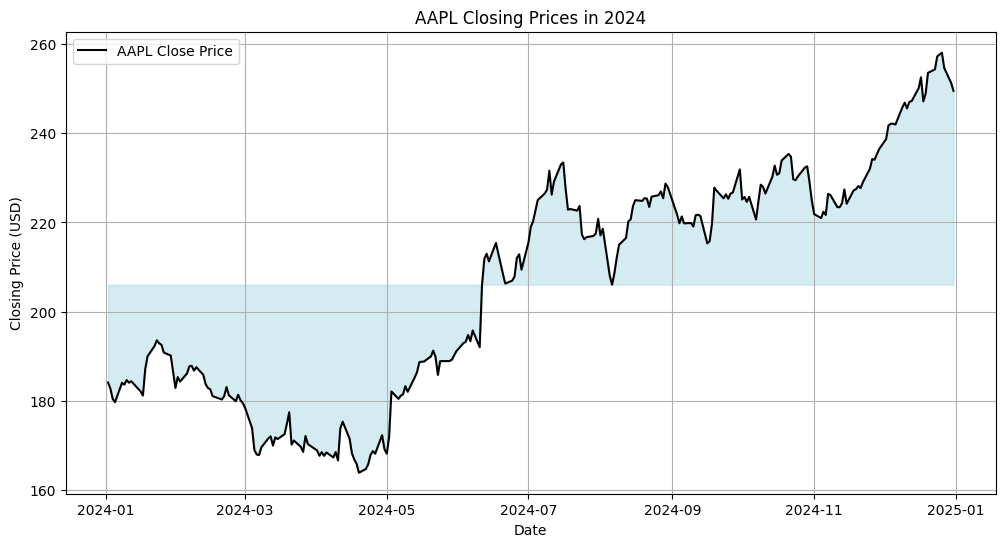

In [ ]:
import yfinance as yf
import matplotlib.dates as mdates

data = yf.download("AAPL", start="2024-01-01", end="2025-01-01")

# handle MultiIndex columns (e.g. (Close, AAPL)) by selecting the correct series
if hasattr(data.columns, "nlevels") and data.columns.nlevels > 1:
	close = data[("Close", "AAPL")]
else:
	close = data["Close"]

plt.figure(figsize=(12,6))
plt.plot(data.index, close, label='AAPL Close Price', color="black")
plt.fill_between(data.index, close, close.mean(), color='lightblue', alpha=0.5)
plt.title("AAPL Closing Prices in 2024")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# use for visualize support zones, moving averages, or trend regions.

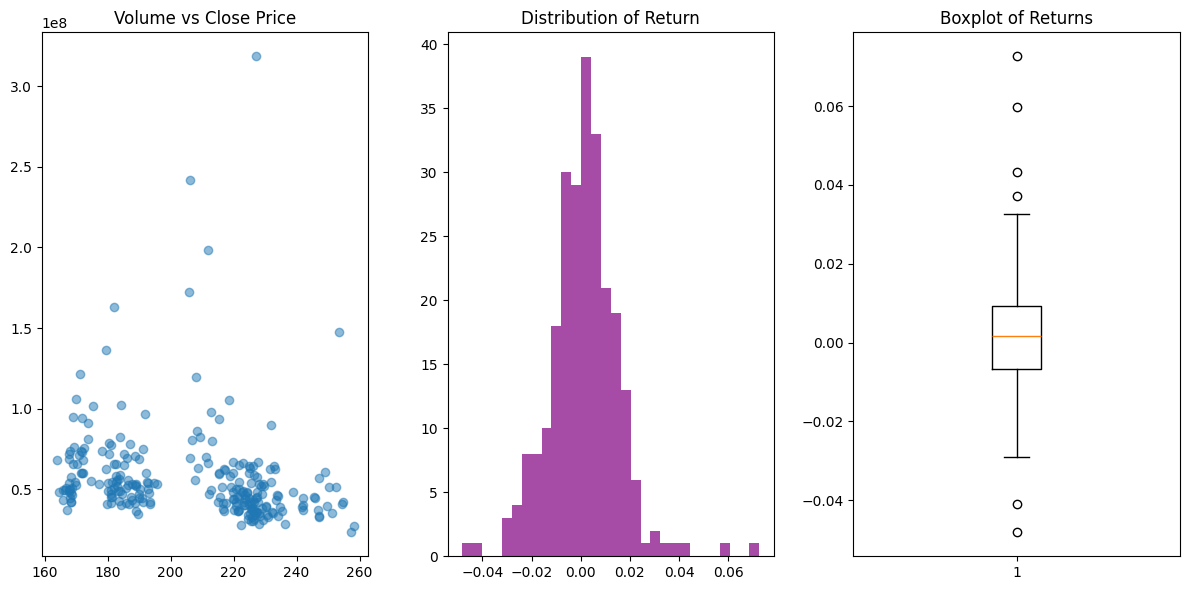

In [51]:
returns=data['Close'].pct_change().dropna()

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.scatter(y=data['Volume'],x=data['Close'],alpha=0.5) # Correlation plot
plt.title("Volume vs Close Price")

plt.subplot(1,3,2)
plt.hist(returns,bins=30,color='purple',alpha=0.7) # volatility plot
plt.title("Distribution of Return")

plt.subplot(1,3,3)
plt.boxplot(returns) # outlier plot
plt.title("Boxplot of Returns")
plt.tight_layout()
plt.show()

# use for identify volatility, outliers, or high-volume price moves.

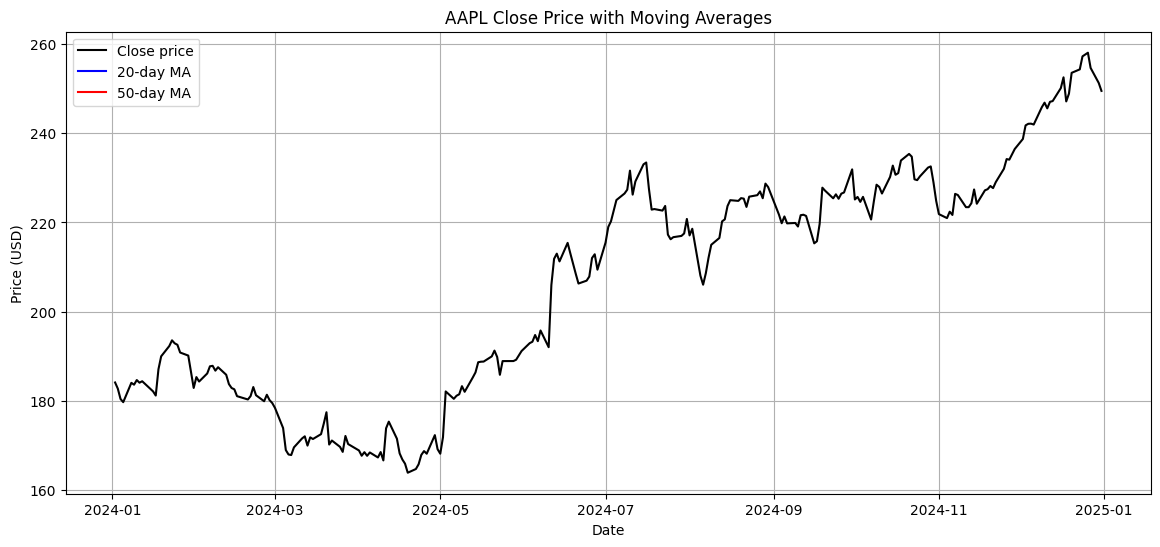

In [55]:
## Moving Average Example
data['MA20']=data['Close'].rolling(window=20).mean()
data['MA50']=data['Close'].rolling(window=50).mean()
plt.figure(figsize=(14,6))

plt.plot(data.index,data['Close'],label="Close price",color='black')
plt.plot(data.index,data['MA20'],label="20-day MA",color='blue')
plt.plot(data.index,data['MA50'],label="50-day MA",color='red')
plt.title("AAPL Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()



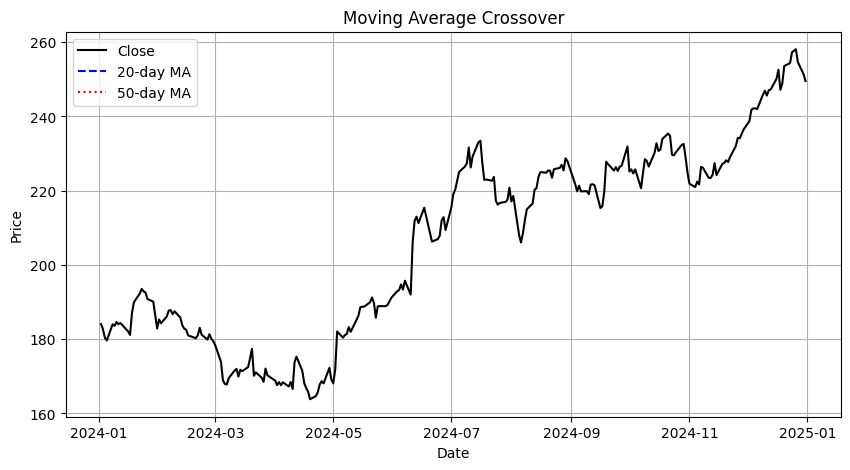

In [57]:
## Moving Average Example
# Moving average visualization
data['MA20'] = data['Close'].rolling(20).mean()
data['MA50'] = data['Close'].rolling(50).mean()

plt.figure(figsize=(10,5))
plt.plot(data.index, data['Close'], label='Close', color='black')
plt.plot(data.index, data['MA20'], label='20-day MA', color='blue', linestyle='--')
plt.plot(data.index, data['MA50'], label='50-day MA', color='red', linestyle=':')
plt.title("Moving Average Crossover")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


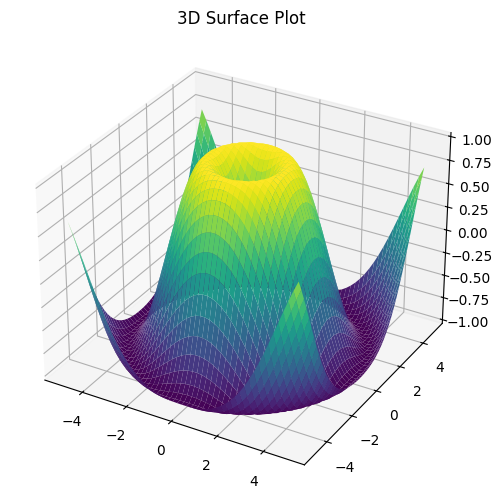

In [60]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5,5,50)
y = np.linspace(-5,5,50)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title("3D Surface Plot")
plt.show()


/tmp/ipykernel_8133/2218120687.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2024-01-01", end="2025-06-30")
[*********************100%***********************]  1 of 1 completed


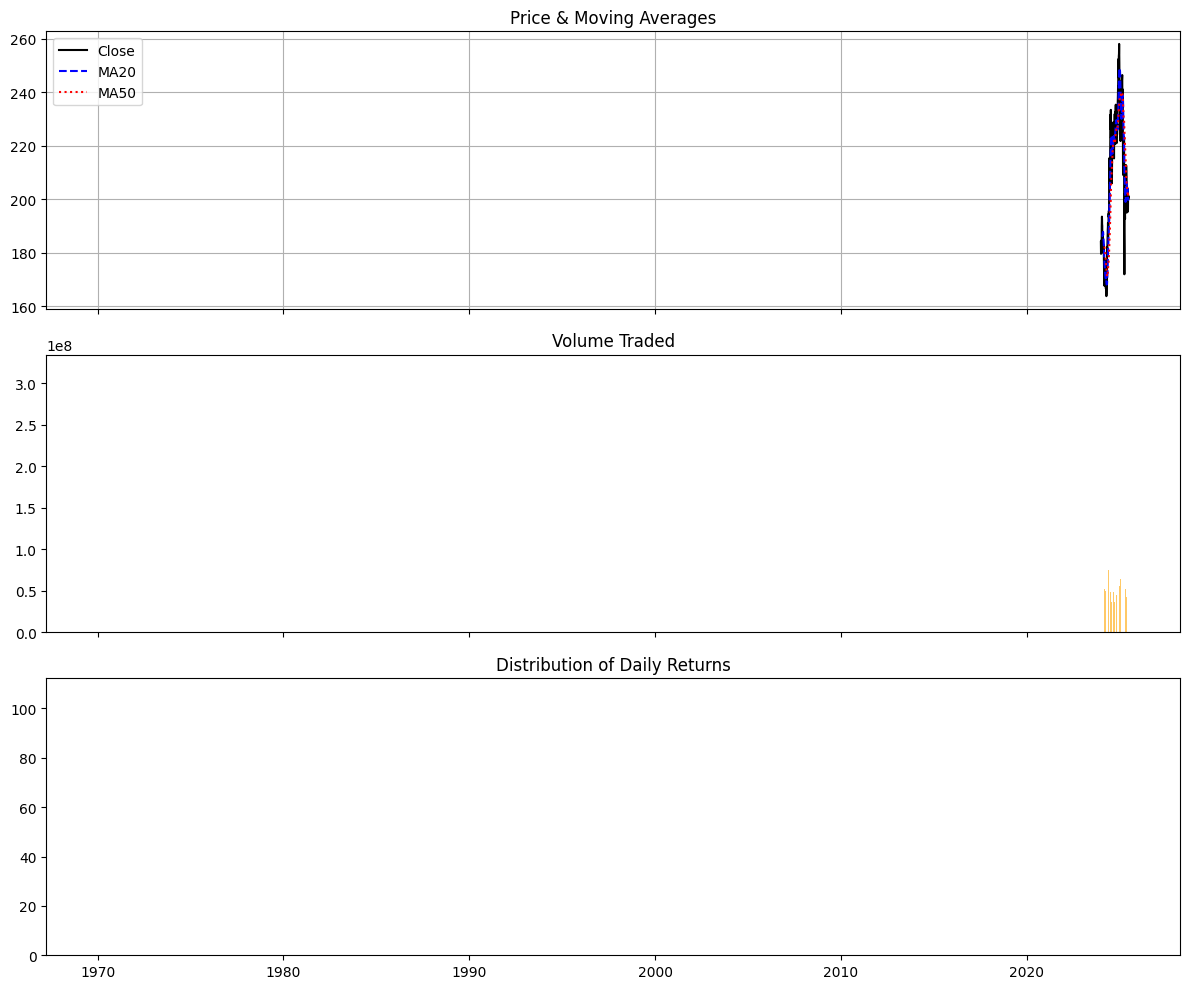